In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#Appropriate dir
os.chdir("C:\\Users\\adam1brownell\\Desktop\Kaggle\Kg_Fraud")
path = os.getcwd()
f = "file"
for i in os.listdir(path):
    print i
    f = i

#Load data from csv
alldata = pd.read_csv(os.path.join(path,f),names = None, index_col = False)
print alldata.head()

#Separate data labels
labels = alldata['Class'].as_matrix()

#Get rid of irrelevant data from dataset
alldata.drop('Time', axis = 1, inplace = True)
alldata.drop('Class',axis = 1, inplace = True)

#Make matrix with 29 features
dataset = alldata.iloc[:].as_matrix()
print dataset.shape
print labels.shape

creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1

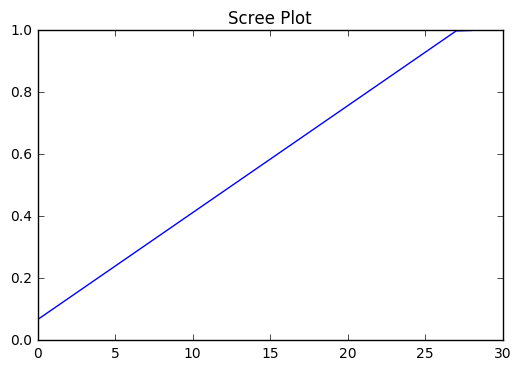

In [6]:
#See if PCA is an appropriate regularization method
import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(prepro.scale(dataset))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.show()
#Clearly variance between features is relatively uniform- unable to cut a significant number

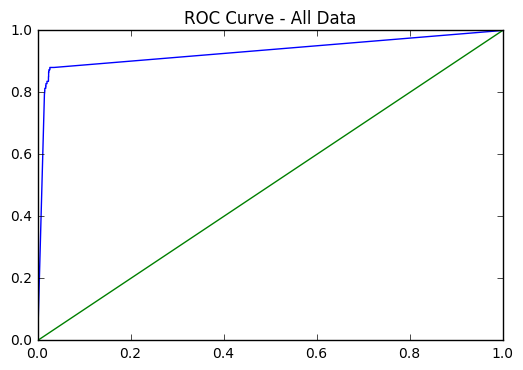

AUC:  0.930672399947
Accuracy:  0.978076458526


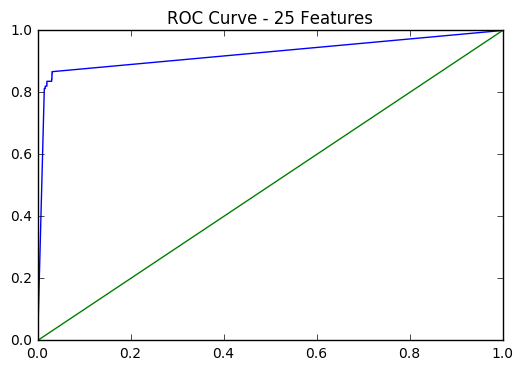

AUC:  0.924266653418
Accuracy:  0.979382601612


In [9]:
#Naive Bayes Predictive 
from sklearn.naive_bayes import GaussianNB
import sklearn.cross_validation as ms

#Cross Val for accuracy
x_train, x_test, y_train, y_test = ms.train_test_split(dataset, labels)

#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predict = nb_model.predict_proba(x_test)

#ROC Curve
import sklearn.metrics as met
fpr1, tpr1, treshholds = met.roc_curve(y_test,nb_predict[:,1])
x1 = [0,1]
y1 = [0,1]
plt.plot(fpr1,tpr1)
plt.plot(x1,y1)
plt.title('ROC Curve - All Data')
plt.show()
print "AUC: ", met.auc(fpr1,tpr1)
print "Accuracy: ", nb_model.score(x_test,y_test)

#PCA on 5 features
pca = PCA()
X_pca = pca.fit_transform(prepro.scale(dataset))

#Cross Val for accuracy
x_train, x_test, y_train, y_test = ms.train_test_split(X_pca, labels)

#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predict = nb_model.predict_proba(x_test)

#ROC Curve
import sklearn.metrics as met
fpr1, tpr1, treshholds = met.roc_curve(y_test,nb_predict[:,1])
x1 = [0,1]
y1 = [0,1]
plt.plot(fpr1,tpr1)
plt.plot(x1,y1)
plt.title('ROC Curve - 25 Features')
plt.show()
print "AUC: ", met.auc(fpr1,tpr1)
print "Accuracy: ", nb_model.score(x_test,y_test)

In [10]:
fraud = 0
nf = 0
for i in labels:
    if i == 0:
        nf = nf + 1
    elif i == 1:
        fraud = fraud +1
    else:
        print i
        
print "Fraud sample: ", fraud 
print "Not Fraud samples: ", nf
#Clearly a uneven dataset, so training needs even sizes if using NN

Fraud sample:  492
Not Fraud samples:  284315
